# Data Cleaning

In [1]:
import pandas as pd
from collections import defaultdict, Counter
import os
import matplotlib.pyplot as plt

In [2]:
def compile_csvs(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    df = pd.concat([pd.read_csv(os.path.join(folder_path, f)) for f in csv_files], ignore_index=True)
    return df

In [3]:
#Full CSV Files
rainfall = compile_csvs("../data/data_gov_sg/rainfall_data")
air_temperature = compile_csvs("../data/data_gov_sg/air-temperature_data")
wind_speed = compile_csvs("../data/data_gov_sg/wind-speed_data")
relative_humidity = compile_csvs("../data/data_gov_sg/relative-humidity_data")
wind_direction = compile_csvs("../data/data_gov_sg/wind-direction_data")
lightning_risk_16S = pd.read_csv("../data/lightning_risk_data/lightning_risk_data_per_min_16S.csv") # Output
input_data_dfs = [rainfall, air_temperature, wind_speed, relative_humidity,wind_direction]
input_data_df_names = ["rainfall", "air_temperature", "wind_speed", "relative_humidity","wind_direction"]


In [38]:
rainfall.head()

,Timestamp,S07,S08,S100,S104,S106,S107,S108,S109,S11,...,S223,S224,S226,S227,S228,S229,S230,S64,S102,S06
0,2020-04-20T00:00:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-20T00:05:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-20T00:10:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-20T00:15:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-20T00:20:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
air_temperature.head()

,Timestamp,S100,S104,S106,S107,S108,S109,S111,S115,S116,S117,S121,S122,S24,S43,S44,S50,S60,S102,S06
0,2020-04-01T00:00:00+08:00,28.2,27.7,25.4,28.1,28.4,27.7,27.8,28.7,28.6,28.8,28.0,27.2,27.7,28.1,27.7,27.7,28.4,NaN,NaN
1,2020-04-01T00:01:00+08:00,28.2,27.7,25.4,28.1,28.4,27.7,27.8,28.7,28.6,28.8,27.9,27.2,27.7,28.1,27.7,27.6,28.4,NaN,NaN
2,2020-04-01T00:02:00+08:00,28.2,27.7,25.4,28.1,28.4,27.7,27.8,28.7,28.6,28.8,27.9,27.2,27.7,28.1,27.8,27.6,28.4,NaN,NaN
3,2020-04-01T00:03:00+08:00,28.2,27.7,25.3,28.0,28.4,27.7,27.8,28.8,28.6,28.8,27.9,27.2,27.7,28.1,27.7,27.6,28.4,NaN,NaN
4,2020-04-01T00:04:00+08:00,28.2,27.7,25.3,28.1,28.4,27.7,27.8,28.8,28.6,28.8,27.9,27.1,27.7,28.2,27.7,27.6,28.4,NaN,NaN


In [40]:
wind_speed.head()

,Timestamp,S100,S104,S106,S108,S109,S115,S116,S117,S24,S43,S44,S50,S107,S60,S122,S111,S121,S102,S06
0,2020-04-29T00:00:00+08:00,2.4,8.30000,1.2,2.8,12.2,2.4,14.1,4.3,2.5,6.4,3.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-29T00:01:00+08:00,2.3,8.30000,1.2,3.0,12.3,2.4,14.1,4.3,2.4,6.3,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-29T00:02:00+08:00,2.4,8.10001,1.3,3.1,12.2,2.4,13.9,4.1,2.3,6.1,3.5,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-29T00:03:00+08:00,2.3,8.10001,1.4,3.1,12.2,2.5,13.8,4.0,2.4,6.2,3.5,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-29T00:04:00+08:00,2.5,8.10001,1.5,3.2,12.1,2.5,13.7,NaN,2.4,6.2,3.5,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
relative_humidity.head()

,Timestamp,S100,S104,S106,S107,S108,S109,S111,S115,S116,S117,S121,S122,S24,S43,S44,S50,S60,S102,S06
0,2020-04-01T00:00:00+08:00,73.7,76.2,89.6,77.4,75.2,81.6,70.7,73.2,81.2,75.5,76.6,93.8,77.1,78.1,77.0,79.2,69.8,NaN,NaN
1,2020-04-01T00:01:00+08:00,73.6,76.1,89.8,77.8,75.1,81.5,70.8,73.2,80.8,75.5,76.6,94.3,77.2,78.1,77.1,79.2,69.9,NaN,NaN
2,2020-04-01T00:02:00+08:00,73.6,76.1,90.1,77.8,75.2,81.6,70.9,73.2,81.0,75.6,76.6,94.5,77.2,78.2,76.9,79.2,69.9,NaN,NaN
3,2020-04-01T00:03:00+08:00,73.5,76.0,90.2,77.6,75.2,81.8,71.0,73.2,80.9,75.7,76.6,94.7,77.3,78.3,77.0,79.3,69.9,NaN,NaN
4,2020-04-01T00:04:00+08:00,73.6,76.1,90.2,77.9,75.2,81.9,71.1,73.0,81.0,75.9,76.8,95.1,77.5,78.3,77.1,79.1,69.9,NaN,NaN


In [42]:
wind_direction.head()

,Timestamp,S100,S104,S106,S107,S108,S109,S115,S116,S117,S122,S24,S43,S44,S50,S60,S111,S121,S102,S06
0,2020-04-01T00:00:00+08:00,69.0,41.0,113.0,18.0,11.0,26.0,65.0,19.0,11.0,43.0,38.0,50.0,46.0,45.0,58.0,NaN,NaN,NaN,NaN
1,2020-04-01T00:01:00+08:00,70.0,41.0,113.0,19.0,11.0,26.0,65.0,19.0,12.0,41.0,37.0,49.0,48.0,46.0,59.0,NaN,NaN,NaN,NaN
2,2020-04-01T00:02:00+08:00,69.0,41.0,112.0,18.0,13.0,26.0,63.0,19.0,10.0,38.0,37.0,47.0,56.0,46.0,58.0,NaN,NaN,NaN,NaN
3,2020-04-01T00:03:00+08:00,71.0,41.0,104.0,17.0,11.0,26.0,56.0,18.0,11.0,33.0,37.0,44.0,58.0,46.0,53.0,NaN,NaN,NaN,NaN
4,2020-04-01T00:04:00+08:00,69.0,41.0,95.0,16.0,10.0,25.0,50.0,18.0,15.0,31.0,39.0,41.0,59.0,46.0,50.0,NaN,NaN,NaN,NaN


In [43]:
lightning_risk_16S.head()

,DateTime,16S
0,2020-04-20 00:08:00+08:00,False
1,2020-04-20 00:09:00+08:00,False
2,2020-04-20 00:10:00+08:00,False
3,2020-04-20 00:11:00+08:00,False
4,2020-04-20 00:12:00+08:00,False


Based on the above, the largest data resolution for the datasets is 5 mins. Hence, we keep our data in 5 min intervals.

In [44]:
# Columns to exclude
exclude_cols = {"Timestamp", "Date", "Time"}

# Count occurrences of each column in the DataFrames
column_counts = Counter()

for df in input_data_dfs:
    for col in df.columns:
        if col not in exclude_cols:
            column_counts[col] += 1

# Convert to DataFrame and sort in ascending order
column_counts_df = pd.DataFrame(column_counts.items(), columns=["Column", "Count"]).sort_values(by="Count")

count_dict = defaultdict(list)
for col, count in column_counts.items():
    count_dict[count].append(col)

# Convert to a regular dictionary (optional)
count_dict = dict(count_dict)

# Print result
print(count_dict.keys())
print([len(count_dict[key]) for key in count_dict.keys()])
print(count_dict)

dict_keys([1, 5])
[62, 19]
{1: ['S07', 'S08', 'S11', 'S112', 'S113', 'S114', 'S118', 'S119', 'S120', 'S123', 'S215', 'S29', 'S33', 'S35', 'S36', 'S40', 'S46', 'S61', 'S66', 'S69', 'S71', 'S77', 'S78', 'S79', 'S81', 'S82', 'S84', 'S88', 'S89', 'S90', 'S900', 'S91', 'S92', 'S94', 'S201', 'S202', 'S203', 'S204', 'S205', 'S207', 'S208', 'S209', 'S210', 'S211', 'S212', 'S213', 'S214', 'S216', 'S217', 'S218', 'S219', 'S220', 'S221', 'S222', 'S223', 'S224', 'S226', 'S227', 'S228', 'S229', 'S230', 'S64'], 5: ['S100', 'S104', 'S106', 'S107', 'S108', 'S109', 'S111', 'S115', 'S116', 'S117', 'S121', 'S122', 'S24', 'S43', 'S44', 'S50', 'S60', 'S102', 'S06']}


Based on above there are a 62 other stations that are not present on other files while 19 are present in all. Hence, we keep those 19 station ids.

In [46]:
station_ids = count_dict[5]
print(station_ids)

['S100', 'S104', 'S106', 'S107', 'S108', 'S109', 'S111', 'S115', 'S116', 'S117', 'S121', 'S122', 'S24', 'S43', 'S44', 'S50', 'S60', 'S102', 'S06']


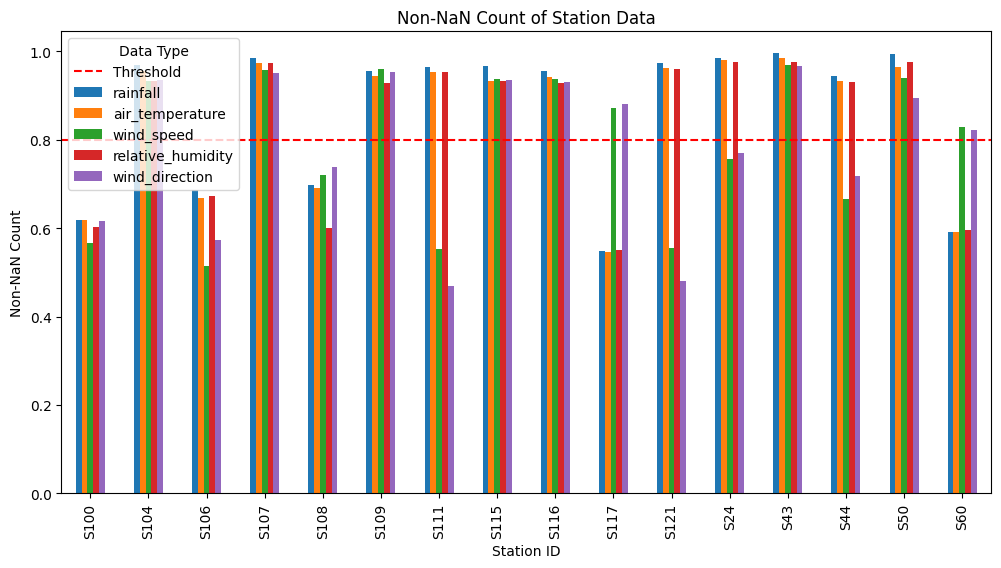

In [58]:

# Dictionary to store non-NaN counts
non_nan_counts = {}

# Compute non-NaN counts for each station_id in each dataframe
for df_name, df in zip(input_data_df_names, input_data_dfs):
    non_nan_counts[df_name] = df[station_ids].count() / df.shape[0]  # Normalized by row count


# Convert to DataFrame for visualization
non_nan_counts_df = pd.DataFrame(non_nan_counts)

# Plot bar chart
non_nan_counts_df.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Station ID")
plt.ylabel("Non-NaN Count")
plt.title("Non-NaN Count of Station Data")
plt.xticks(rotation=90)
threshold_value = 0.8  # Change this to your desired threshold
plt.axhline(y=threshold_value, color='r', linestyle='--', label="Threshold")
plt.legend(title="Data Type")
plt.show()




As you can see there are some stations with very minimal amount of data with various reasons. Hence, we drop these stations.

In [57]:
# Threshold for filtering
threshold_value = 0.8

# Transpose so rows are station_ids, columns are dataset names
# Then check if all values for each station_id >= threshold
valid_station_ids = non_nan_counts_df[non_nan_counts_df >= threshold_value].dropna(axis=0, how='any').index.tolist()

print("Station IDs with >=80% non-NaN in all datasets:")
print(valid_station_ids)


Station IDs with >=80% non-NaN in all datasets:
['S104', 'S107', 'S109', 'S115', 'S116', 'S43', 'S50']


In [ ]:


for station_to_drop in ["S06","S102","S122"]:
    station_ids.remove(station_to_drop)

In [49]:
def prepare_csv(df_raw, filename):
    df_raw["Timestamp"] = pd.to_datetime(df_raw["Timestamp"])
    
    # Extract only the required columns and filter out irrelevant stations
    selected_columns = ["Timestamp"] + station_ids
    df_selected = df_raw[selected_columns]

    # Interpolate data for short missing data
    df_filled = df_selected.interpolate(method='linear', limit=10, limit_direction='forward')

    # Filter rows where the minute is a multiple of 5
    df_filtered = df_filled[df_filled["Timestamp"].dt.minute % 5 == 0]
    if not os.path.exists("../data/final_data"):
        os.makedirs("../data/final_data")
    output_path = os.path.join("../data/final_data", filename)
    print(f"{filename} is now saved at data/final_data.")
    df_filtered.to_csv(output_path, index=False)

In [55]:
for df_name, df in zip(input_data_df_names, input_data_dfs):
    prepare_csv(df,df_name+".csv")

rainfall.csv is now saved at data/final_data.
air_temperature.csv is now saved at data/final_data.
wind_speed.csv is now saved at data/final_data.
relative_humidity.csv is now saved at data/final_data.
wind_direction.csv is now saved at data/final_data.


In [ ]:
# Filter rows where the minute is a multiple of 5
lightning_risk_16S = lightning_risk_16S.rename(columns={"DateTime": "Timestamp"})
lightning_risk_16S["Timestamp"] = pd.to_datetime(lightning_risk_16S["Timestamp"])
df_filtered = lightning_risk_16S[lightning_risk_16S["Timestamp"].dt.minute % 5 == 0]
output_path = os.path.join("../data/final_data", "Lightning Risk 16S.csv")
df_filtered.to_csv(output_path, index=False)
print(f"{"Lightning Risk 16S.csv"} is now saved at data/final_data.")

Lightning Risk 16S.csv is now saved at data/final_data.
